<a href="https://colab.research.google.com/github/MSR806/DL/blob/master/DL_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Funtion

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w,b}(x) = \frac{1}{1+e^{-(wx + b)}}$

In [9]:
def sigmoid(x, w, b):
  return 1/(1+np.exp(-(w*x + b)))

In [10]:
sigmoid(1,3,5)

0.9996646498695336

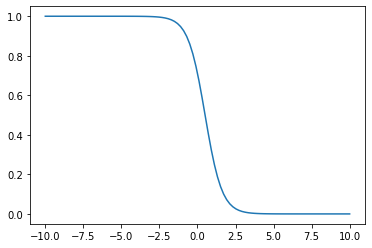

In [11]:
w = -1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 0.9    #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
# X will iterate and gives a nparray as output
plt.plot(X,Y)
plt.show() 

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^{-(w_1x_1+ w_2x_2 + b)}}$

In [12]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [13]:
w1 = 0.5
w2 = 0.5
b = 0

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

In [14]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red','yellow', 'green'])

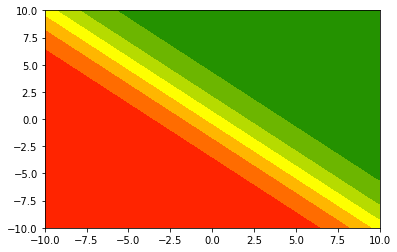

In [15]:
plt.contourf(XX1,XX2,Y, cmap = my_cmap)
plt.show()

In [16]:
Y.shape

(100, 100)

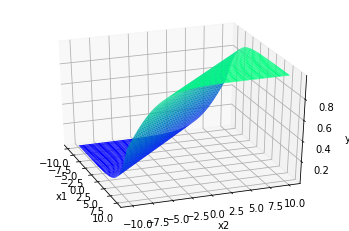

In [17]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(XX1, XX2, Y, cmap='winter')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 360-20)
plt.show()

#Compute Loss for a given Dataset

In [18]:
w_unkwn = 0.5
b_unkwn = 0.25

X = np.random.random(25) * 20 -10
Y = sigmoid(X, w_unkwn, b_unkwn)

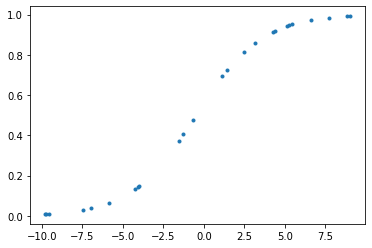

In [19]:
plt.plot(X, Y, '.')
plt.show()

In [20]:
def cal_loss(X, Y, w_est, b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(x, w_est, b_est))**2
  return loss

In [21]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

In [22]:
Loss.shape

(101, 101)

In [23]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = cal_loss(X,Y, WW[i, j], BB[i,j])

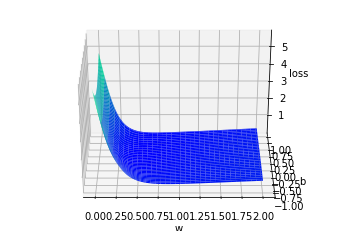

In [24]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(WW, BB, Loss, cmap='winter')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.view_init(30, 360-90)
plt.show()

In [25]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [26]:
print(i,j)

63 25


In [27]:
print(WW[i,j], BB[i,j])

0.5 0.26


#Class for Sigmoid Neuron

In [28]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(self.w.T, x) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (y_pred - 1) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (y_pred - 1)

  def fit(self, X, Y, epochs=1, lr=1, initialise= True, display_loss = False):
    if initialise:
      self.w = np.random.randn(X.shape[1])
      self.b = 0

    for i in tqdm_notebook(range(epochs), total = epochs, unit = 'epoch'):

      # intialise w,b
      dw = 0
      db = 0

      if display_loss:
        loss = {}

      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr*dw
      self.b -= lr*db

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
  


  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
    

#Fit for toy data

In [29]:
X = np.asarray([[2.5,2.5], [4,-1], [1,-4], [-3,1.25], [-2,-4], [1,5]])
Y = [1, 1, 1, 0, 0, 0]

In [30]:
sn = SigmoidNeuron()

In [31]:
def sn_plot(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))

  ax.contourf(XX1 ,XX2, YY, cmap = my_cmap,)
  ax.scatter(X[:, 0],X[:, 1], c = Y, cmap = my_cmap)
  ax.plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[-1.16996914  1.89699123] -0.0007501081358556463



[-1.20907004  1.87217807] -0.011471087479156065



[-1.25611807  1.83832472] -0.025726342807628824



[-1.31654349  1.79005496] -0.04567768863341721



[-1.40130956  1.71649121] -0.07568761744153175



[-1.53405038  1.59425303] -0.12509142384149569



[-1.75459624  1.3845094 ] -0.20895807279655115



[-2.00863127  1.14388119] -0.29552388419408065



[-2.19502817  0.95959755] -0.2779447250085367



[-2.3955028   0.77905787] -0.15137476699378644



[-2.50191624  0.88060478] 0.011706392531351223



[-2.63609573  0.85780855] 0.1524482503709108



[-2.71830622  0.94690394] 0.27936560400875377



[-2.8287877   0.91951681] 0.388080173210933



[-2.89340835  0.99567604] 0.4866195669631457



[-2.98160994  0.97888886] 0.5719021178407953



[-3.03963365  1.02814674] 0.6498324861876693



[-3.10751062  1.03129412] 0.7188596640405539



[-3.1620921   1.05759385] 0.7821212408686954



[-3.2166095   1.07117801] 0.8395594142427623



[-3.2660897   1.08801732] 0.8924294687846818



[-3.31296093  1.10254835] 0.9411913170891063



[-3.35700826  1.11653346] 0.986420152621744



[-3.3986635   1.12969936] 1.0285378419693119



[-3.43816061  1.14218795] 1.0679098595619358



[-3.47571904  1.15406171] 1.104842567776682



[-3.51152475  1.16538033] 1.1395964988245306



[-3.5457383   1.17619497] 1.1723945198235373



[-3.57849916  1.18655007] 1.203428504117455



[-3.60992916  1.19648445] 1.2328646282040885


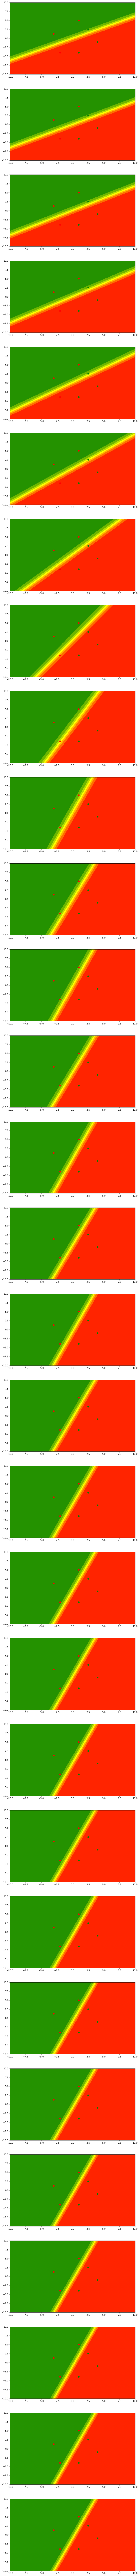

In [32]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*7))
for i in range(N):
  print(sn.w,sn.b)
  ax = plt.subplot(N,1,i+1)
  sn_plot(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.7, False)


#Load Data